<div style='background-image: url("../share/Aerial_view_LLNL.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: center ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.8) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">Notebook 2:</div>
            <div style="font-size: x-large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Visualizing Earthquake Magnitudes: <br><br> Amplitude and Distance</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">2014 South Napa Earthquake.</div>
            <div style="font-size: medium ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Estimated Time: 30 minutes.</div>
        </div>
    </div>
</div>

# STEPS:
## 1) Select the earthquake
## 2) Download data for nearby seismometers
## 3) Plot map of event and station locations
## 4) Select 3 stations to work with
## 5) Plot their seismograms
## 6) Calculate each stations peak amplitude and distance from the event
## 7) Use figure to read off a local magnitude using each station

       

### Import modules

Here we are just importing some existing programs and functions to use in our notebook.

In [11]:
%matplotlib notebook

from __future__ import print_function
import matplotlib.pyplot as plt
from MagPlay import *
import obspy
import glob
import numpy as np
from obspy.clients.fdsn import Client

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 13, 10

# 1) Download the Earthquake
Here we select and download an earthquake by choosing a date and a magnitude.
We choose the magnitude 6, 2014 South Napa earthquake.

In [12]:
client = Client("USGS")
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa earthquake
cat = client.get_events(starttime=t - 100, endtime=t + 3600,
                        minmagnitude=6)

# 2) Download data for nearby seismometers
Here we download data from all seismometers within a particular distance of the event.

In [13]:
download_data(cat)
st, inv = load_data()

Data has been downloaded
Data has been loaded


# 3) Plot map of event and station locations

<IPython.core.display.Javascript object>


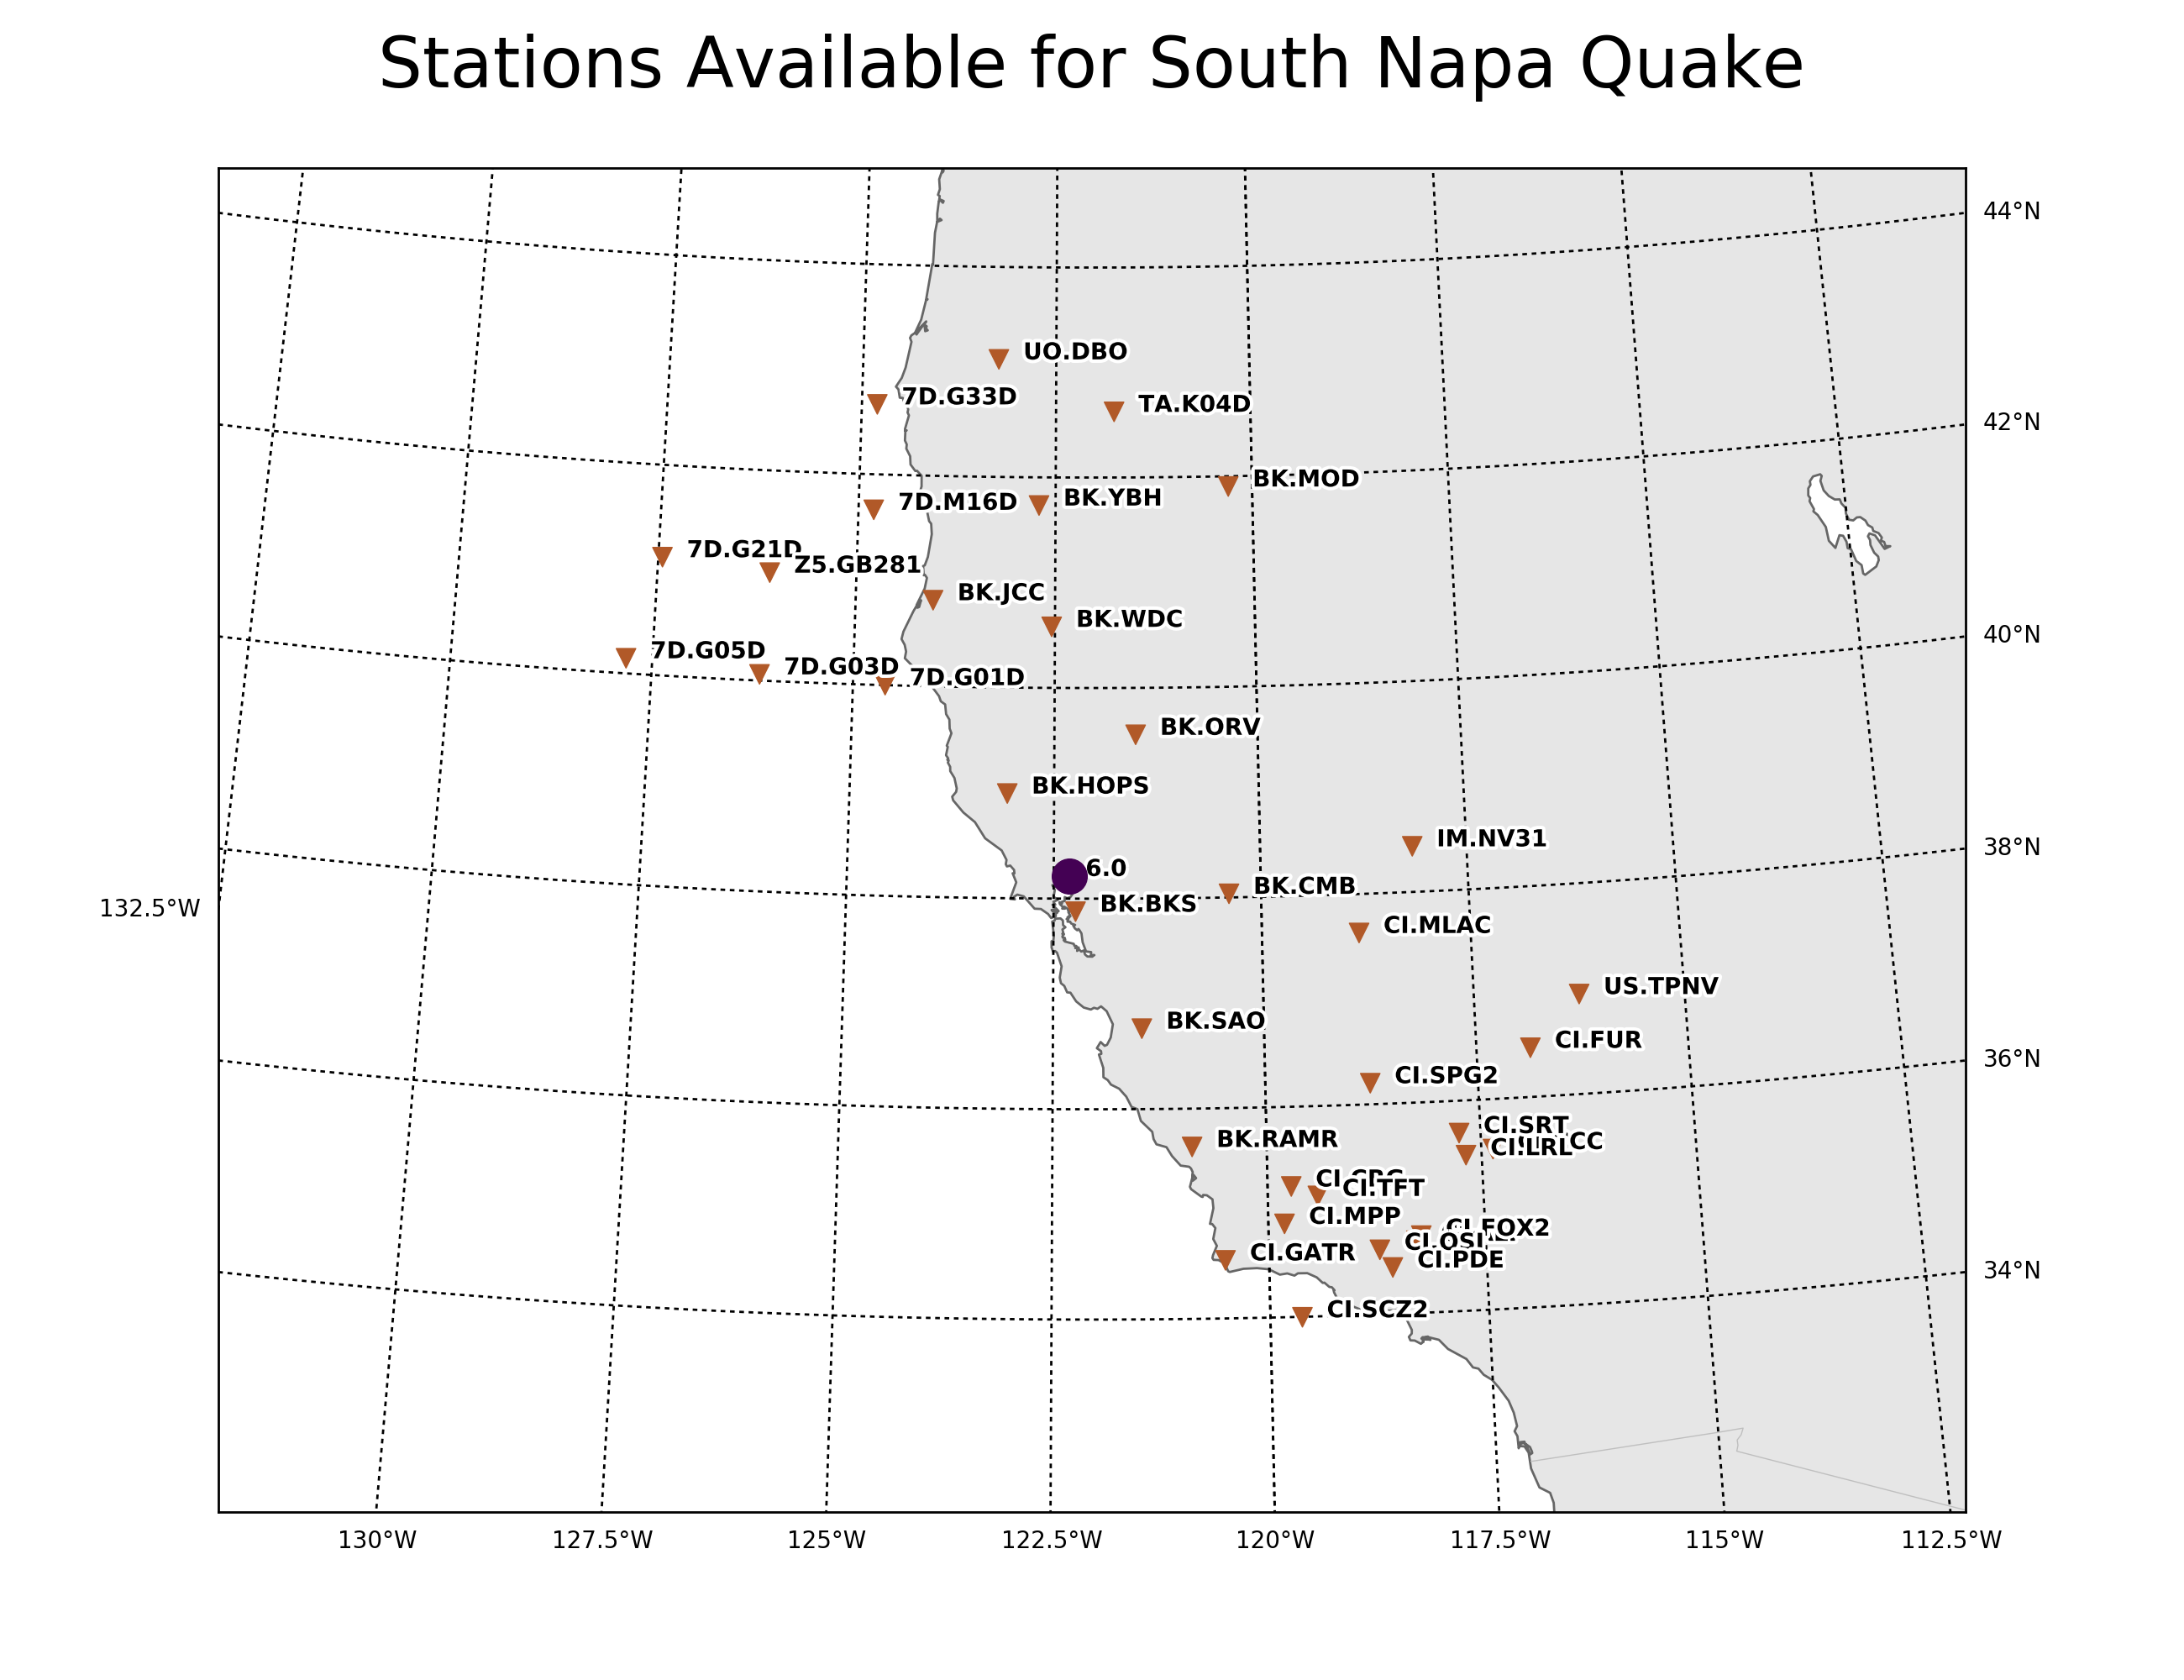

/Users/Alex/Programs/anaconda/lib/python3.5/site-packages/obspy/imaging/maps.py:402: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(water_fill_color)
/Users/Alex/Programs/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/Alex/Programs/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Alex/Programs/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [14]:
plot_stations(cat)

# 4) Select 3 stations to work with

Pick three stations from the above plot.

Try stations:     
  1) Roughly in a line and at different distances     
  2) Not in a line at the same distance     

In [8]:
Stations = ['CMB','ORV','MOD']
#Stations = ['FUR','SPG2','RAMR']

# 5) Plot their seismograms

Here we plot their vertical (up-down) component of the seismometers at each station.     
In fact we generate electronic plots equivilent to those that would have been drawn on paper by a Wood-Anderson seismometer

<IPython.core.display.Javascript object>


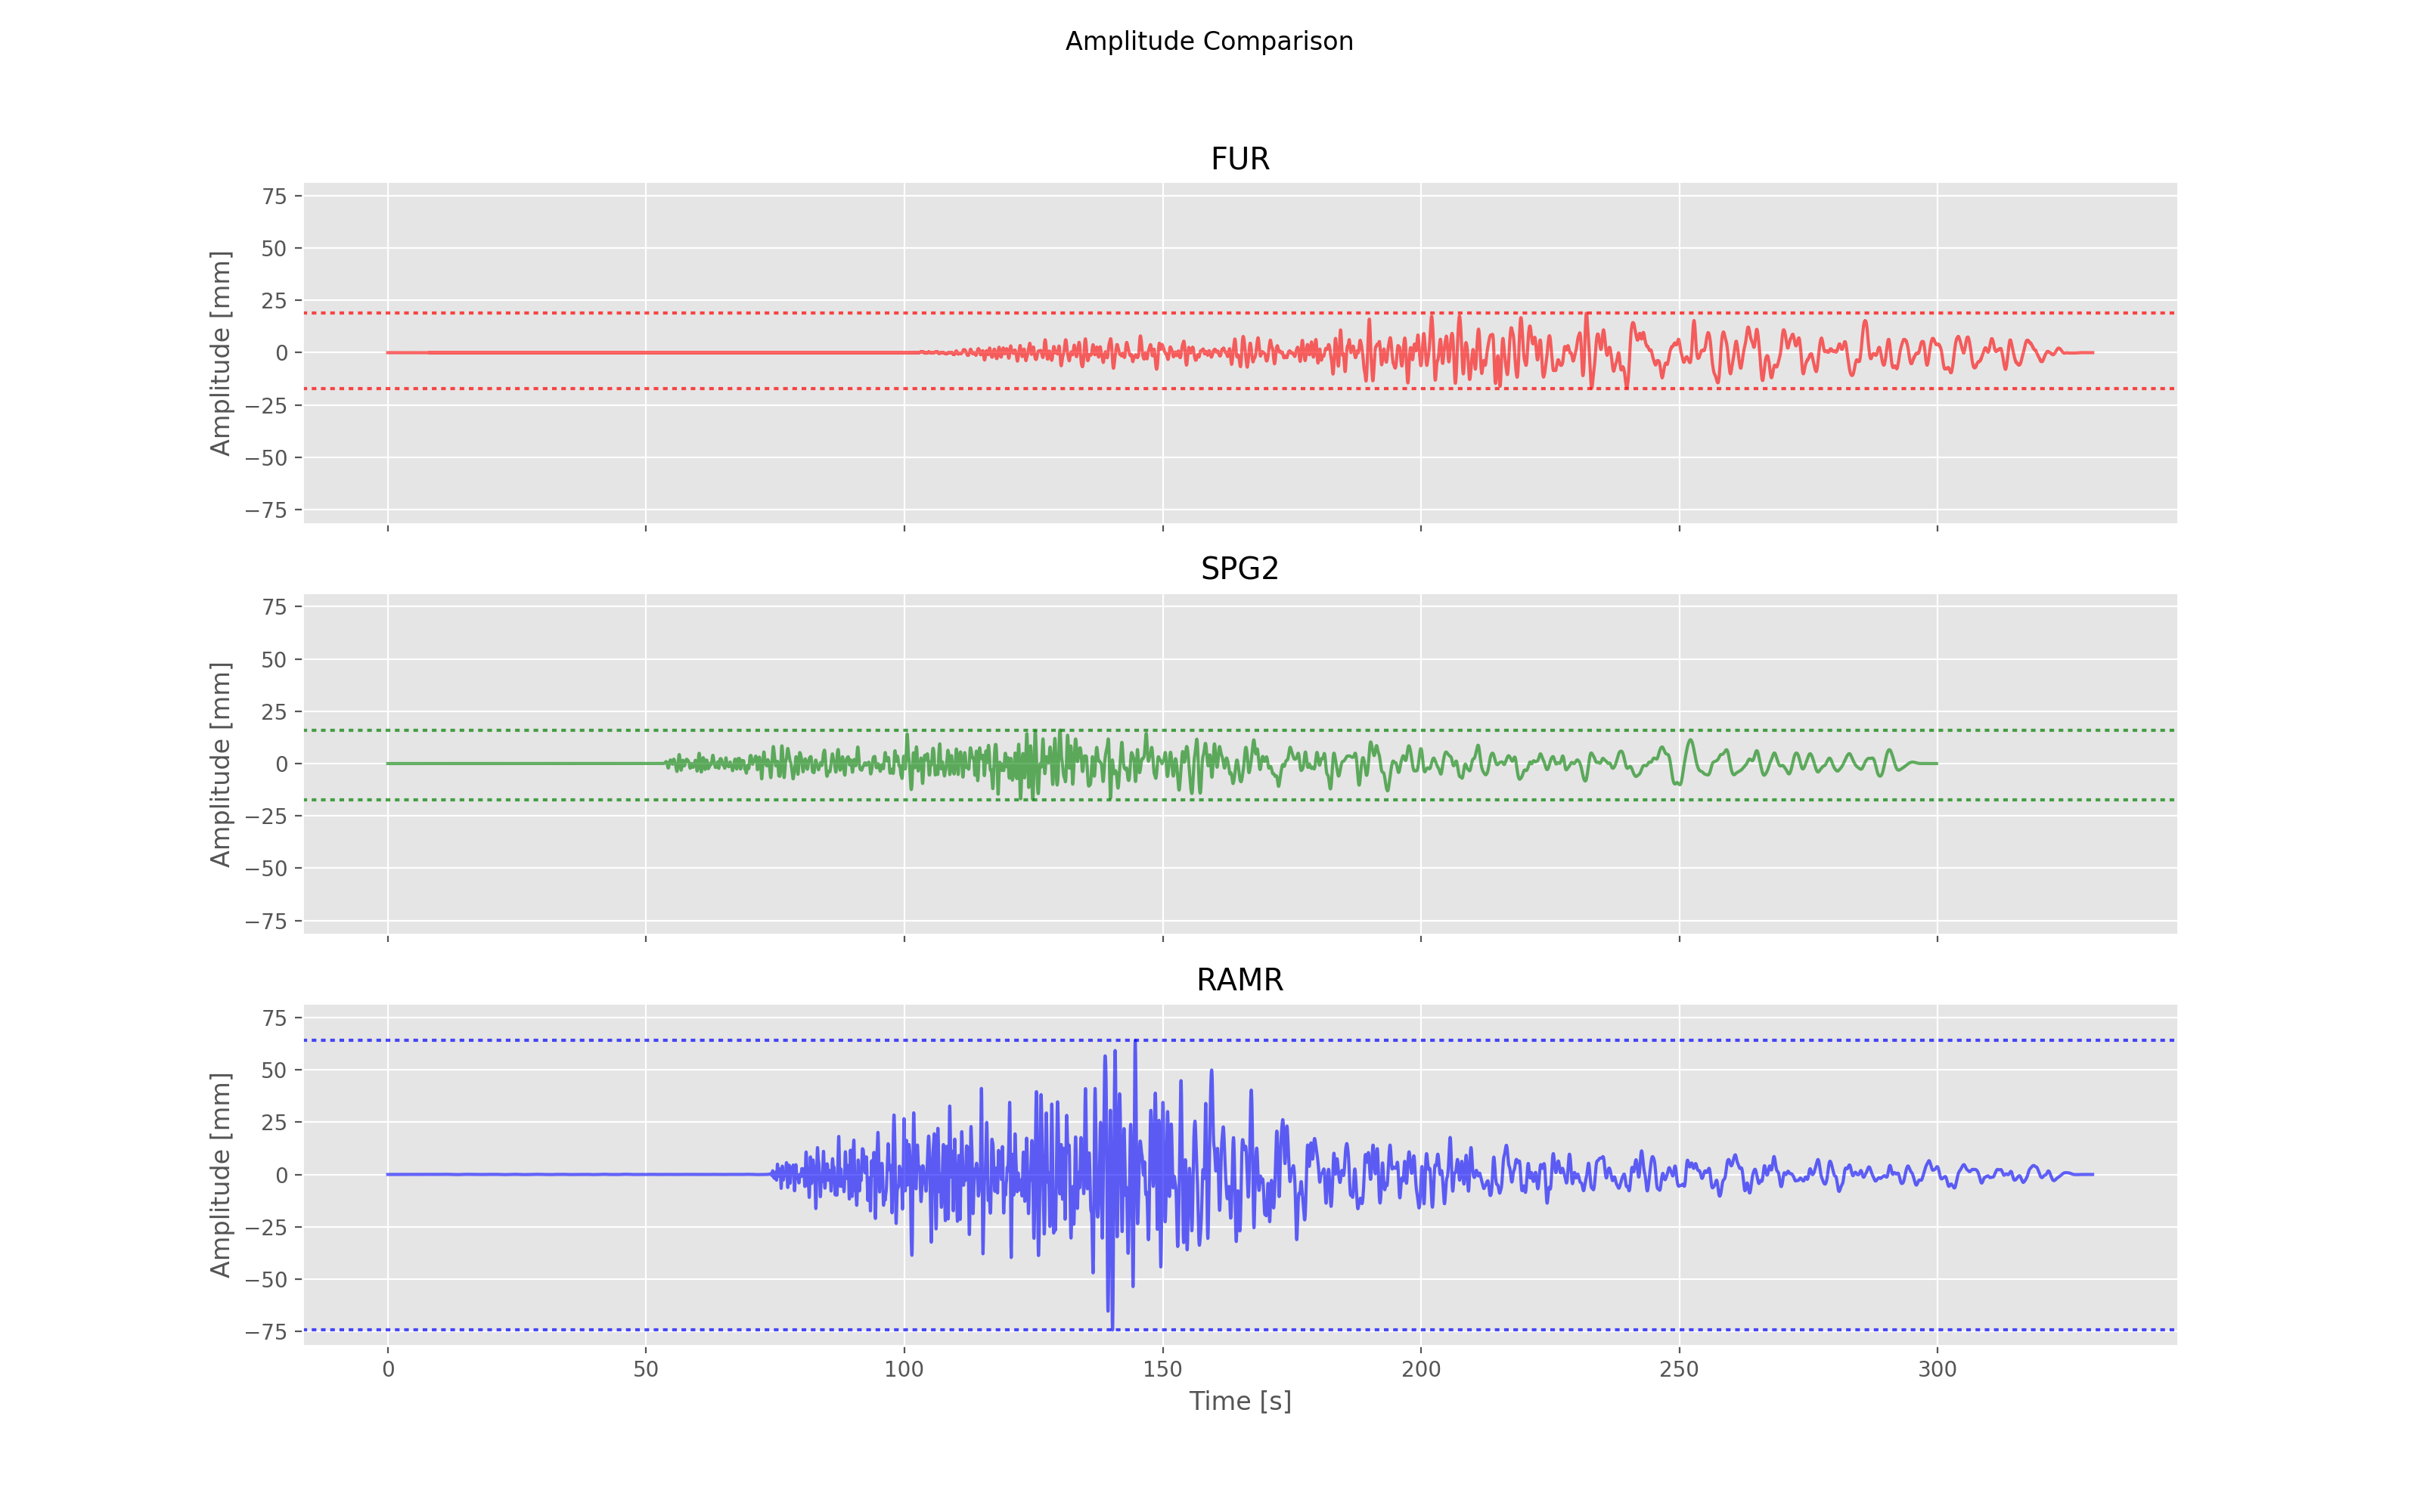

In [9]:
plot_seismograms(Stations, st)

# 6) Calculate each stations peak amplitude and distance from the event

In [10]:
print_station_dist_amp(Stations, st, cat, inv)

  Station  Distance [km]  Amplitude [mm]
0     FUR     520.262832       18.858933
1    SPG2     386.054249       17.237609
2    RAMR     313.748261       74.388751


# 7) Use figure to read off a local magnitude using each station
For each station above:       
1)    Use a straight edge to join the distance (left) of the station to it's maximum Wood-Anderson amplitude (right) on the diagram below      
2)    Read off where the line crosses the magnitude scale in the center

![title](fig1.jpg)